### ФИО Студента:  Окунев Н.А.
#### Номер группы: 18-ИВТ-2
##### Вариант: 15
##### Задание: air_quality
*   Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
* 	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
* 	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
*   Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
* 	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
* 	Заполните пропущенные значения в данных;
* 	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 
* Кодировка классификаторов: 2 – линейная регрессия, LASSO регуляризатор; 3 – линейная регрессия, RIDGE регуляризатор;

In [200]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, spearmanr
%matplotlib inline
warnings.simplefilter('ignore')
label_encoder = LabelEncoder()
scaler = StandardScaler()

In [201]:
# Удалим пустые колонки
df = df.drop('Unnamed: 15',axis =1)
df = df.drop('Unnamed: 16',axis =1)
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
5,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848"
6,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603"
7,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702"
8,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648"
9,11/03/2004,03.00.00,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517"


### 1

* Date  - Дата
* Time  - Время
* True hourly averaged concentration CO in mg/m^3 (reference analyzer) - Истинная среднечасовая концентрация СО в мг / м ^ 3 (контрольный анализатор)
* PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) - PT08.S1  среднечасовая чувствительность датчика 
* True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) - Истинная среднечасовая концентрация неметановых углеводородов в микрог / м ^ 3 
* True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) - Истинная среднечасовая концентрация бензола в микрог / м ^ 3 
* PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) - PT08.S2  среднечасовой отклик сенсора
* True hourly averaged NOx concentration in ppb (reference analyzer) - Истинная среднечасовая концентрация NOx в миллионных долях 
* PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) - PT08.S3  среднечасовой отклик датчика 
* True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) - Истинная среднечасовая концентрация NO2 в микрог / м ^ 3 
* PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) - PT08.S4 (оксид вольфрама) среднечасовой отклик датчика 
* PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) - PT08.S5 (оксид индия) среднечасовая чувствительность датчика
* Temperature in Â°C - Температура в °С
* Relative Humidity (%) - Относительная влажность (%)
* AH Absolute Humidity - Абсолютная влажность

### 2

In [162]:
len1 = len(df)
df.drop_duplicates(keep='first',inplace=True)
len2 = len(df)
#;; was deleted manualy, before reading df to correct opening
print("Всего удалено дубликатов" ,len1 - len2)

Всего удалено дубликатов 0


### 3

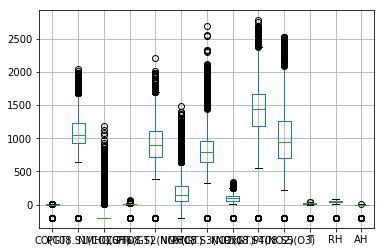

In [163]:
df.boxplot()

In [164]:
df = (df - df.mean()) / df.std()
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03
mean,8.663347e-17,-4.276026e-16,-9.368303e-15,4.906896e-16,3.324559e-16,9.897739e-16,4.202224e-16,2.691101e-15,-2.873410e-15,-3.288607e-16,-2.437092e-15,2.118311e-15,-2.747852e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.134928e+00,-3.786738e+00,-2.926545e-01,-4.878315e+00,-3.197455e+00,-1.431890e+00,-3.090093e+00,-2.033622e+00,-3.406347e+00,-2.571621e+00,-4.855572e+00,-4.675974e+00,-4.955847e+00
25%,4.482203e-01,-3.880454e-01,-2.926545e-01,5.157820e-02,-5.363057e-01,-4.607668e-01,-4.906625e-01,-4.056132e-02,-4.419417e-01,-6.019896e-01,2.596298e-02,-1.051500e-01,1.931900e-01
50%,4.598097e-01,1.215749e-02,-2.926545e-01,1.458262e-01,1.182251e-03,-1.072779e-01,-3.075117e-03,2.981802e-01,1.166934e-01,-7.237747e-02,1.717841e-01,1.779638e-01,2.004893e-01
75%,4.739746e-01,5.215066e-01,-2.926545e-01,2.835732e-01,6.146196e-01,4.482045e-01,5.124632e-01,5.896554e-01,5.790122e-01,6.126167e-01,3.314929e-01,4.376475e-01,2.086839e-01
max,5.937317e-01,3.004584e+00,9.643743e+00,1.494297e+00,3.854153e+00,5.090173e+00,5.863502e+00,2.220341e+00,2.961238e+00,3.387609e+00,8.059902e-01,9.609200e-01,2.326675e-01


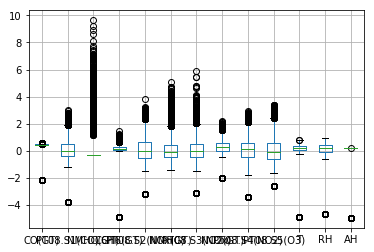

In [165]:
df.boxplot()

### 4

Категориальные признаки у нас только дата, они уникальны, поэтому замена не требуется

### 5

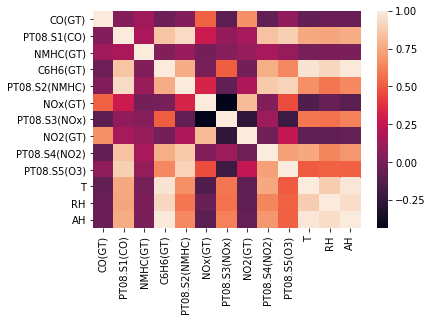

In [168]:
corr = df.corr()
sns.heatmap(corr)

### 6

In [169]:
df.count()

CO(GT)           9357
PT08.S1(CO)      9357
NMHC(GT)         9357
C6H6(GT)         9357
PT08.S2(NMHC)    9357
NOx(GT)          9357
PT08.S3(NOx)     9357
NO2(GT)          9357
PT08.S4(NO2)     9357
PT08.S5(O3)      9357
T                9357
RH               9357
AH               9357
dtype: int64

Пропущенных данных нет

### 7

### линейная регрессия, LASSO регуляризатор;

In [195]:
data_X, data_Y = df.drop('NMHC(GT)', axis=1).values, df['NMHC(GT)']
train_x, test_x, train_y, test_y = train_test_split(data_X, data_Y, test_size=0.3)

In [198]:
lasso = Lasso()

search = GridSearchCV(lasso, {'alpha': np.arange(0.005, 5, 0.005)})
search.fit(train_x, train_y)
best = search.best_estimator_.alpha
print('Лучшее значение Альфа:', best)

lasso = Lasso(alpha=best)
lasso.fit(train_x, train_y)
lasso_predict = lasso.predict(test_x)
P, p_value_P = pearsonr(lasso_predict, test_y)
print("Коррелция по Пирсону: ", P)
S, p_value_S = spearmanr(lasso_predict, test_y)
print("Корреляция по Спирмену: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)

Лучшее значение Альфа: 0.005
Коррелция по Пирсону:  0.9993963823506579
Корреляция по Спирмену:  0.9977827079180018
P_VALUSE_P : 0.0
P_VALUSE_S : 0.0


### линейная регрессия, RIDGE регуляризатор;

In [199]:
from sklearn.linear_model import Ridge
params = {'alpha': np.arange(2, 5, 0.05)}
reg = Ridge()
params = {'alpha': np.arange(2, 5, 0.05)}
reg_grid = GridSearchCV(reg, params)
reg_grid.fit(train_x, train_y)
best_alpha = reg_grid.best_estimator_.alpha
reg = Ridge(alpha=best_alpha)
reg.fit(X_train,y_train)
pred_reg = reg.predict(test_x)
P, p_value_P = pearsonr(pred_reg, test_y)
print("Коррелция по Пирсону: ", P)
S, p_value_S = spearmanr(pred_reg, test_y)
print("Корреляция по Спирмену:: ", S)
print("P_VALUSE_P :", p_value_P)
print("P_VALUSE_S :", p_value_S)

Коррелция по Пирсону:  0.93963823506579
Корреляция по Спирмену:  0.99727079180018
P_VALUSE_P : 0.0
P_VALUSE_S : 0.0

